# Import packages

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import statistics
import spm1d

# Bland Altman plot

## Data cleaning

In [15]:
# Read Excel file
bertec = pd.read_excel("Bertec_GRF_variables_7may.xlsx")
bertec = bertec.reindex(columns=['ID', 'Exo', 'Condition', 'Load', 'Stance_Time_L', 'Stance_Time_R', 'Stride_Time_L', 'Stride_Time_R', 'Cadence', 'Step_Length', 'Impact_Peak_Force_L', 'Impact_Peak_Force_R', 'Active_Peak_Force_L', 'Active_Peak_Force_R', 'Impulse_L', 'Impulse_R', 'Loading_Rate_L', 'Loading_Rate_R'])

loadsol = pd.read_excel("Loadsol_GRF variables_updated.xlsx")
loadsol = loadsol.reindex(columns=['ID', 'Exo', 'Condition', 'Load', 'Stance_Time_L', 'Stance_Time_R', 'Stride_Time_L', 'Stride_Time_R', 'Cadence', 'Step_Length', 'Impact_Peak_Force_L', 'Impact_Peak_Force_R', 'Active_Peak_Force_L', 'Active_Peak_Force_R', 'Impulse_L', 'Impulse_R', 'Loading_Rate_L', 'Loading_Rate_R'])

In [4]:
# Read Excel file
bertec = pd.read_excel("Data_loadsol validation study.xlsx", sheet_name="Bertec_GRF variables")
bertec = bertec.reindex(columns=['ID', 'Exo', 'Condition', 'Load', 'Stance_Time_L', 'Stance_Time_R', 'Stride_Time_L', 'Stride_Time_R', 'Cadence', 'Step_Length', 'Impact_Peak_Force_L', 'Impact_Peak_Force_R', 'Active_Peak_Force_L', 'Active_Peak_Force_R', 'Impulse_L', 'Impulse_R', 'Loading_Rate_L', 'Loading_Rate_R'])

loadsol = pd.read_excel("Data_loadsol validation study.xlsx", sheet_name="loadol_GRF variables")
loadsol = loadsol.reindex(columns=['ID', 'Exo', 'Condition', 'Load', 'Stance_Time_L', 'Stance_Time_R', 'Stride_Time_L', 'Stride_Time_R', 'Cadence', 'Step_Length', 'Impact_Peak_Force_L', 'Impact_Peak_Force_R', 'Active_Peak_Force_L', 'Active_Peak_Force_R', 'Impulse_L', 'Impulse_R', 'Loading_Rate_L', 'Loading_Rate_R'])

### Filter dataframe into each condition

In [5]:
def filter_dataframe(df, exo, load, condition):
    filtered_df = df[(df["Exo"]==f"{exo}")&(df["Load"]==f"{load}")&(df["Condition"]==f"{condition}")]
    filtered_df.sort_values(by='ID', ascending=True)
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

In [6]:
# 25kg

# Separate into load and conditions
bertec_25kg_flat = filter_dataframe(bertec, "Non_Exo", "25kg", "Flat")
bertec_25kg_incline = filter_dataframe(bertec, "Non_Exo", "25kg", "Incline")
bertec_25kg_decline = filter_dataframe(bertec, "Non_Exo", "25kg", "Decline")

loadsol_25kg_flat = filter_dataframe(loadsol, "Non_Exo", "25kg", "Flat")
loadsol_25kg_incline = filter_dataframe(loadsol, "Non_Exo", "25kg", "Incline")
loadsol_25kg_decline =  filter_dataframe(loadsol, "Non_Exo", "25kg", "Decline")

# Verify they are sorted accordingly by id
print(bertec_25kg_flat['ID'].equals(loadsol_25kg_flat['ID']))
print(bertec_25kg_incline['ID'].equals(loadsol_25kg_incline['ID']))
print(bertec_25kg_decline['ID'].equals(loadsol_25kg_decline['ID']))

# 35kg

# Separate into load and conditions
bertec_35kg_flat =  filter_dataframe(bertec, "Non_Exo", "35kg", "Flat")
bertec_35kg_incline = filter_dataframe(bertec, "Non_Exo", "35kg", "Incline")
bertec_35kg_decline = filter_dataframe(bertec, "Non_Exo", "35kg", "Decline")

loadsol_35kg_flat = filter_dataframe(loadsol, "Non_Exo", "35kg", "Flat")
loadsol_35kg_incline = filter_dataframe(loadsol, "Non_Exo", "35kg", "Incline")
loadsol_35kg_decline = filter_dataframe(loadsol, "Non_Exo", "35kg", "Decline")

# Verify they are sorted accordingly by id
print(bertec_35kg_flat['ID'].equals(loadsol_35kg_flat['ID']))
print(bertec_35kg_incline['ID'].equals(loadsol_35kg_incline['ID']))
print(bertec_35kg_decline['ID'].equals(loadsol_35kg_decline['ID']))

True
True
True
True
True
True


## Get variable statistics

In [7]:
# Get variable names into a list
grf_variable_name = []
for i in range(4,18):
    name = (loadsol.iloc[:,i].name.replace("_", " "))
    grf_variable_name.append(name)

In [8]:
# Function to create dataframe
def grf_statistic(df_condition, name_of_df: str):
    # Calculate mean and SD
    variable_mean = []
    variable_sd = []
    for i in range(4, 18):
        variable_mean.append(statistics.mean(df_condition.iloc[:,i]))
        variable_sd.append(statistics.stdev(df_condition.iloc[:,i]))
    d = {'GRF variable': grf_variable_name, 'Mean': variable_mean, 'SD': variable_sd} # Store list into dictionary
    df = pd.DataFrame(d) # Store dict into dataframe
    df["Mean (SD)"] = df["Mean"].round(2).astype(str) + " (" + df["SD"].round(2).astype(str) + ")"
    df["Condition"] = f"{name_of_df}"
    return df

In [9]:
stats_bertec_25kg_flat = grf_statistic(bertec_25kg_flat, "Bertec 25kg Flat")
stats_bertec_35kg_flat = grf_statistic(bertec_35kg_flat, "Bertec 35kg Flat")
stats_loadsol_25kg_flat = grf_statistic(loadsol_25kg_flat, "Loadsol 25kg Flat")
stats_loadsol_35kg_flat = grf_statistic(loadsol_35kg_flat, "Loadsol 35kg Flat")

stats_bertec_25kg_incline = grf_statistic(bertec_25kg_incline, "Bertec 25kg Incline")
stats_bertec_35kg_incline = grf_statistic(bertec_35kg_incline, "Bertec 35kg Incline")
stats_loadsol_25kg_incline = grf_statistic(loadsol_25kg_incline, "Loadsol 25kg Incline")
stats_loadsol_35kg_incline = grf_statistic(loadsol_35kg_incline, "Loadsol 35kg Incline")

stats_bertec_25kg_decline = grf_statistic(bertec_25kg_decline, "Bertec 25kg Decline")
stats_bertec_35kg_decline = grf_statistic(bertec_35kg_decline, "Bertec 35kg Decline")
stats_loadsol_25kg_decline = grf_statistic(loadsol_25kg_decline, "Loadsol 25kg Decline")
stats_loadsol_35kg_decline = grf_statistic(loadsol_35kg_decline, "Loadsol 35kg Decline")

stats_df_all = pd.concat([stats_bertec_25kg_flat, stats_bertec_35kg_flat, stats_loadsol_25kg_flat, stats_loadsol_35kg_flat,
                          stats_bertec_25kg_incline, stats_bertec_35kg_incline, stats_loadsol_25kg_incline, stats_loadsol_35kg_incline,
                          stats_bertec_25kg_decline, stats_bertec_35kg_decline, stats_loadsol_25kg_decline, stats_loadsol_35kg_decline])
stats_df_all

,GRF variable,Mean,SD,Mean (SD),Condition
0,Stance Time L,0.766263,0.072819,0.77 (0.07),Bertec 25kg Flat
1,Stance Time R,0.764191,0.058813,0.76 (0.06),Bertec 25kg Flat
2,Stride Time L,1.182205,0.104588,1.18 (0.1),Bertec 25kg Flat
3,Stride Time R,1.187321,0.100983,1.19 (0.1),Bertec 25kg Flat
4,Cadence,96.259284,8.694110,96.26 (8.69),Bertec 25kg Flat
...,...,...,...,...,...
9,Active Peak Force R,1055.635535,173.611381,1055.64 (173.61),Loadsol 35kg Decline
10,Impulse L,623.011278,86.575419,623.01 (86.58),Loadsol 35kg Decline
11,Impulse R,662.635964,89.030047,662.64 (89.03),Loadsol 35kg Decline
12,Loading Rate L,11515.033482,3249.896393,11515.03 (3249.9),Loadsol 35kg Decline


## Plotting figure 

Note: x-axis as gold standard (Bertec)

In [10]:
list = loadsol["Exo"] == "Non_Exo"
list.value_counts()[True]

48

In [16]:
loadsol['Condition'][9]

'Incline'

In [22]:
loadsol.iloc[:,2][0]

'Incline'

In [40]:
# Write a function to plot all variables
def get_plot(df_loadsol, df_bertec, plot_name):
    count = 1
    fig, axes = plt.subplots(7, 2, figsize=(10,20))
    for i in range(4, 18):
        difference = df_loadsol.iloc[:,i]-df_bertec.iloc[:,i] # Loadsol data - Bertec data 

        # Scatter plot
        axes[int((i-4)/2), (i-4)%2].scatter(df_bertec.iloc[:,i], difference, marker='.', c='blue') # x-axis is Bertec data

        # Calculate mean and SD
        mean_difference = statistics.mean(difference)
        lower_bound = mean_difference-1.96*(statistics.stdev(difference))
        upper_bound = mean_difference+1.96*(statistics.stdev(difference))

        # Store data in list
        mean_list.append(mean_difference)
        lower_bound_list.append(lower_bound)
        upper_bound_list.append(upper_bound)

        # Plot mean and SD line
        axes[int((i-4)/2), (i-4)%2].axhline(lower_bound, color='red', linestyle='--')
        axes[int((i-4)/2), (i-4)%2].axhline(mean_difference, color='red')
        axes[int((i-4)/2), (i-4)%2].axhline(upper_bound, color='red', linestyle='--')

        if count <= 4: # Stance time and step time
            # Plot axis
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (s)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (s)', fontsize=12)
        elif count <= 5: # cadence
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (steps/minute)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (steps/minute)', fontsize=12)
        elif count <= 6: # step length
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (m)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (m)', fontsize=12)
        elif count <= 10: # peak impact and active force
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (N)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N)', fontsize=12)
        elif count <= 12: # Impulse
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (Ns)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (Ns)', fontsize=12)
        elif count <= 14: # Loading rate
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (N/s)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N/s)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        count += 1
    plt.tight_layout()
    return fig # plt.savefig(f"{plot_name}.png")

# Function to create dataframe
def put_in_df(condition_name):
    d = {'GRF variable': grf_variable_name, 'Bias': mean_list, 'Lower bound': lower_bound_list, 'Upper bound': upper_bound_list} # Store list into dictionary
    df = pd.DataFrame(d)
    df["95% LoA"] = df["Lower bound"].round(2).astype(str) + " - " + df["Upper bound"].round(2).astype(str)
    df["Condition"] = f"{condition_name}"
    return df

### Single plot

In [30]:
loadsol.iloc[:,3]

0      35kg
1      35kg
2      35kg
3      25kg
4      25kg
       ... 
97     35kg
98     35kg
99     25kg
100    25kg
101    25kg
Name: Load, Length: 102, dtype: object

In [37]:
loadsol.iloc[:,10]

0       841.603039
1      1532.488378
2      1387.307539
3       884.172161
4      1506.529842
          ...     
97     1488.105877
98     1137.682867
99      811.363028
100    1492.939755
101    1072.392413
Name: Impact_Peak_Force_L, Length: 102, dtype: float64

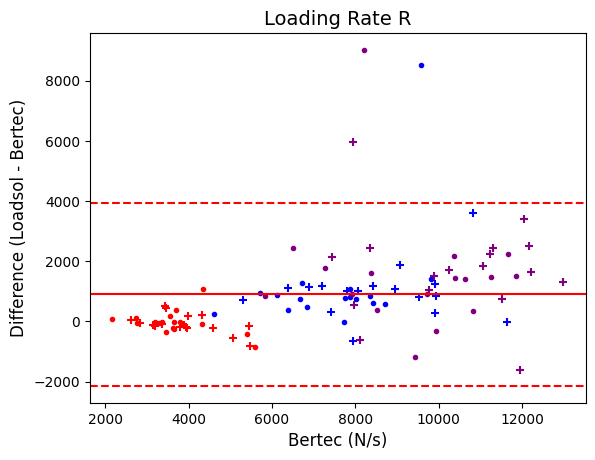

In [51]:
j = 17
name = (bertec.iloc[:,j].name.replace("_", " "))

# Compute differences
difference = loadsol.iloc[:,j]-bertec.iloc[:,j] # Loadsol data - Bertec data

# Scatter plot
for i in range(0, len(loadsol.iloc[:,2])):
    if loadsol.iloc[:,2][i] == 'Flat' and loadsol.iloc[:,3][i] == '25kg':
        plt.scatter(bertec.iloc[:,j][i], difference[i], marker='.', c='blue')
    elif loadsol.iloc[:,2][i] == 'Flat' and loadsol.iloc[:,3][i] == '35kg':
        plt.scatter(bertec.iloc[:,j][i], difference[i], marker='+', c='blue')    
    elif loadsol.iloc[:,2][i] == 'Incline' and loadsol.iloc[:,3][i] == '25kg':
        plt.scatter(bertec.iloc[:,j][i], difference[i], marker='.', c='red')
    elif loadsol.iloc[:,2][i] == 'Incline' and loadsol.iloc[:,3][i] == '35kg':
        plt.scatter(bertec.iloc[:,j][i], difference[i], marker='+', c='red')        
    elif loadsol.iloc[:,2][i] == 'Decline' and loadsol.iloc[:,3][i] == '25kg':
        plt.scatter(bertec.iloc[:,j][i], difference[i], marker='.', c='purple')
    elif loadsol.iloc[:,2][i] == 'Decline' and loadsol.iloc[:,3][i] == '35kg':
        plt.scatter(bertec.iloc[:,j][i], difference[i], marker='+', c='purple')        

# Calculate mean and SD
mean = statistics.mean(difference)
lower_sd = mean-1.96*(statistics.stdev(difference))
upper_sd = mean+1.96*(statistics.stdev(difference))

# Plot mean and SD line
plt.axhline(upper_sd, color='red', linestyle='--')
plt.axhline(mean, color='red')
plt.axhline(lower_sd, color='red', linestyle='--')

# Plot text
plt.title(name, fontsize=14)
plt.xlabel('Bertec (N/s)', fontsize=12)
plt.ylabel('Difference (Loadsol - Bertec)', fontsize=12)
plt.show()

### All conditions

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.031752,-0.099825,0.036321,-0.1 - 0.04,Overall
1,Stance Time R,-0.033150,-0.125270,0.058969,-0.13 - 0.06,Overall
2,Stride Time L,-0.005281,-0.208179,0.197617,-0.21 - 0.2,Overall
3,Stride Time R,-0.006757,-0.235012,0.221498,-0.24 - 0.22,Overall
4,Cadence,0.551282,-11.590758,12.693323,-11.59 - 12.69,Overall
5,Step Length,-0.004780,-0.104790,0.095230,-0.1 - 0.1,Overall
6,Impact Peak Force L,-90.945651,-426.681041,244.789739,-426.68 - 244.79,Overall
7,Impact Peak Force R,-55.800990,-323.186570,211.584589,-323.19 - 211.58,Overall
8,Active Peak Force L,23.789992,-127.225852,174.805835,-127.23 - 174.81,Overall
9,Active Peak Force R,23.957387,-175.901799,223.816573,-175.9 - 223.82,Overall


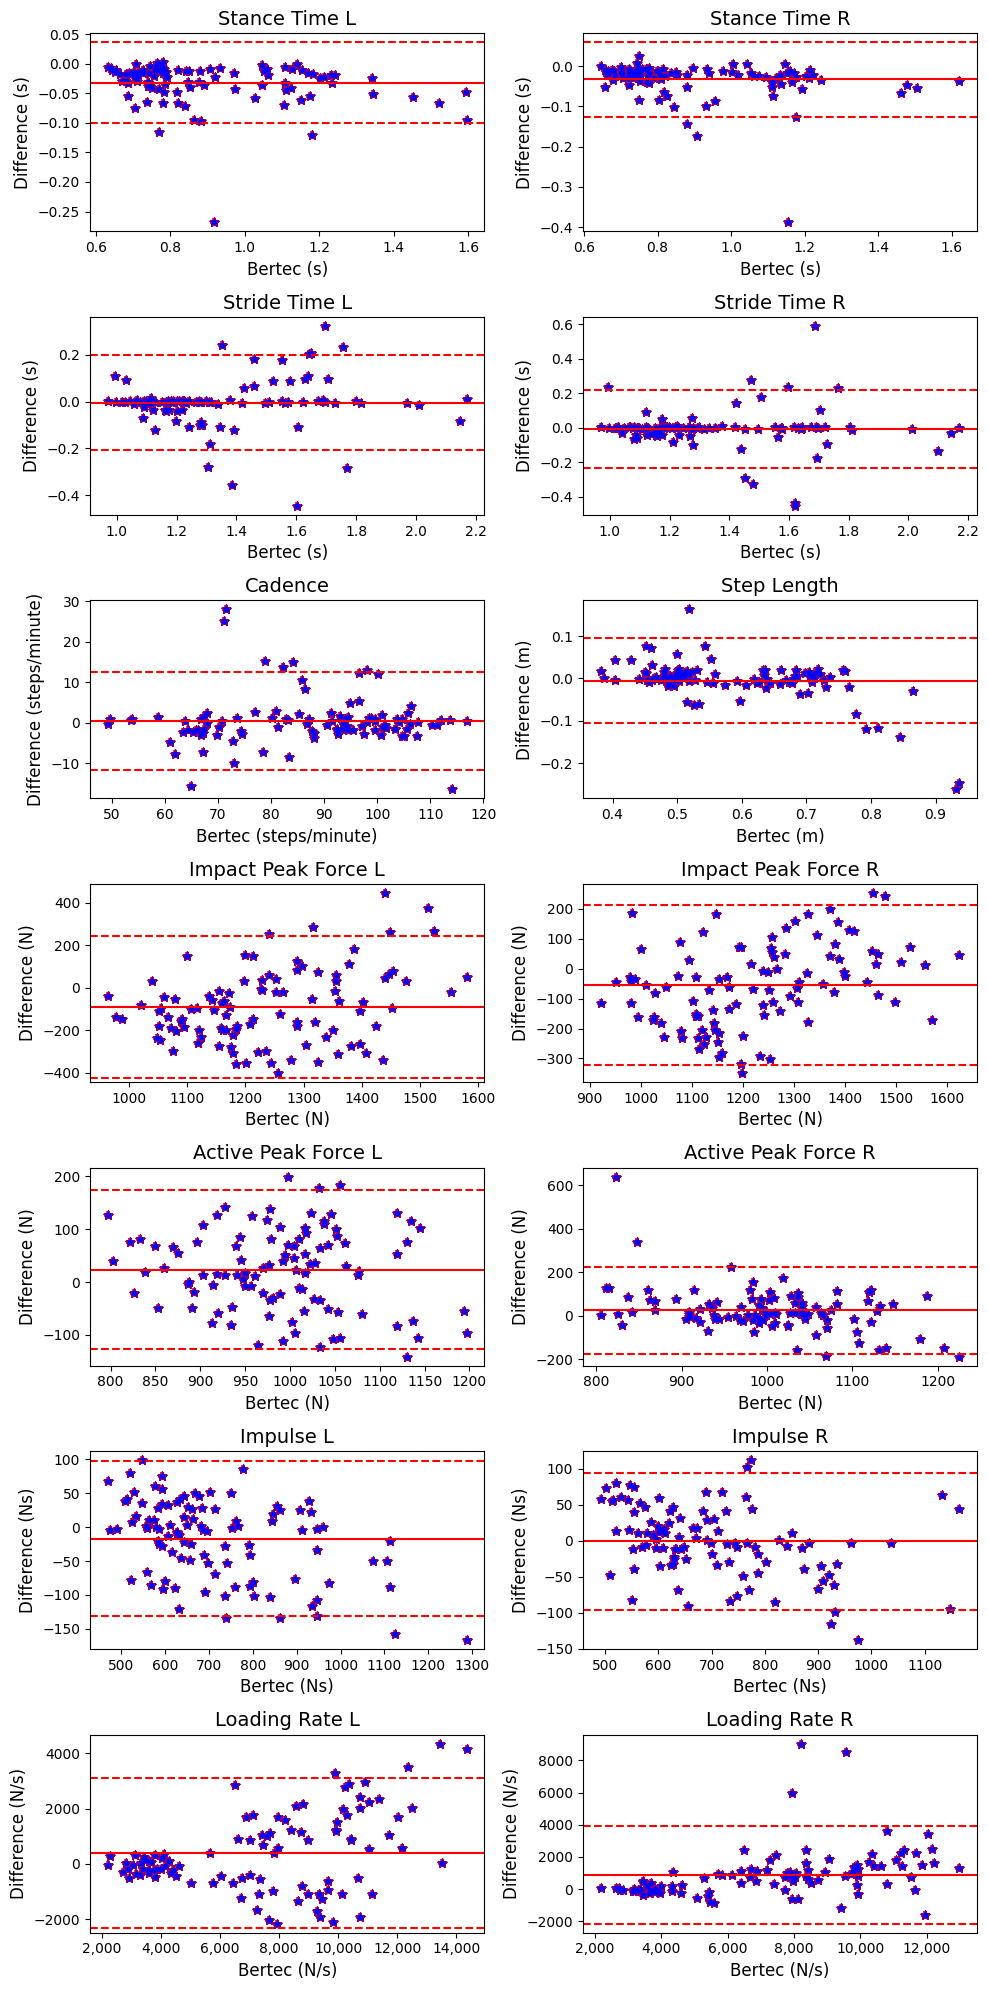

In [41]:
mean_list = []
lower_bound_list = []
upper_bound_list = []

figure_overall = get_plot(loadsol, bertec, 'overall')

df_all_condition = put_in_df("Overall")
df_all_condition

## Flat

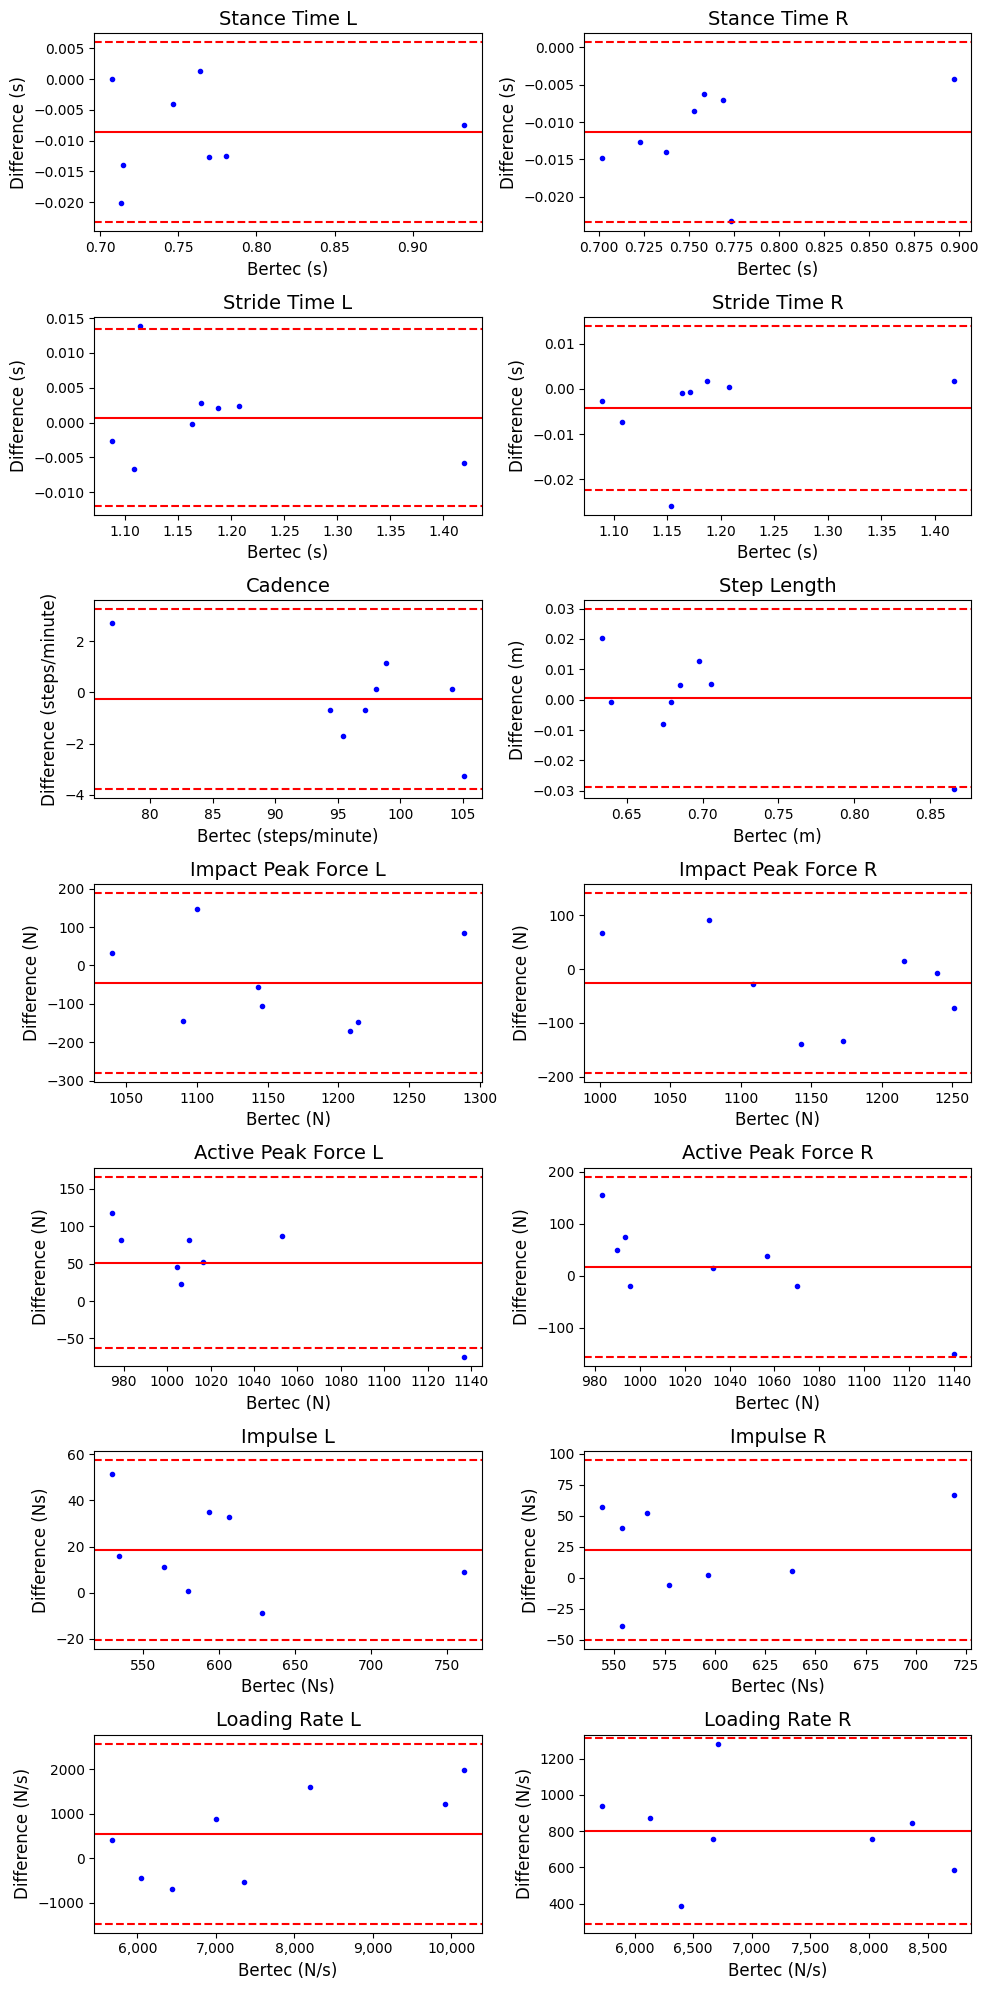

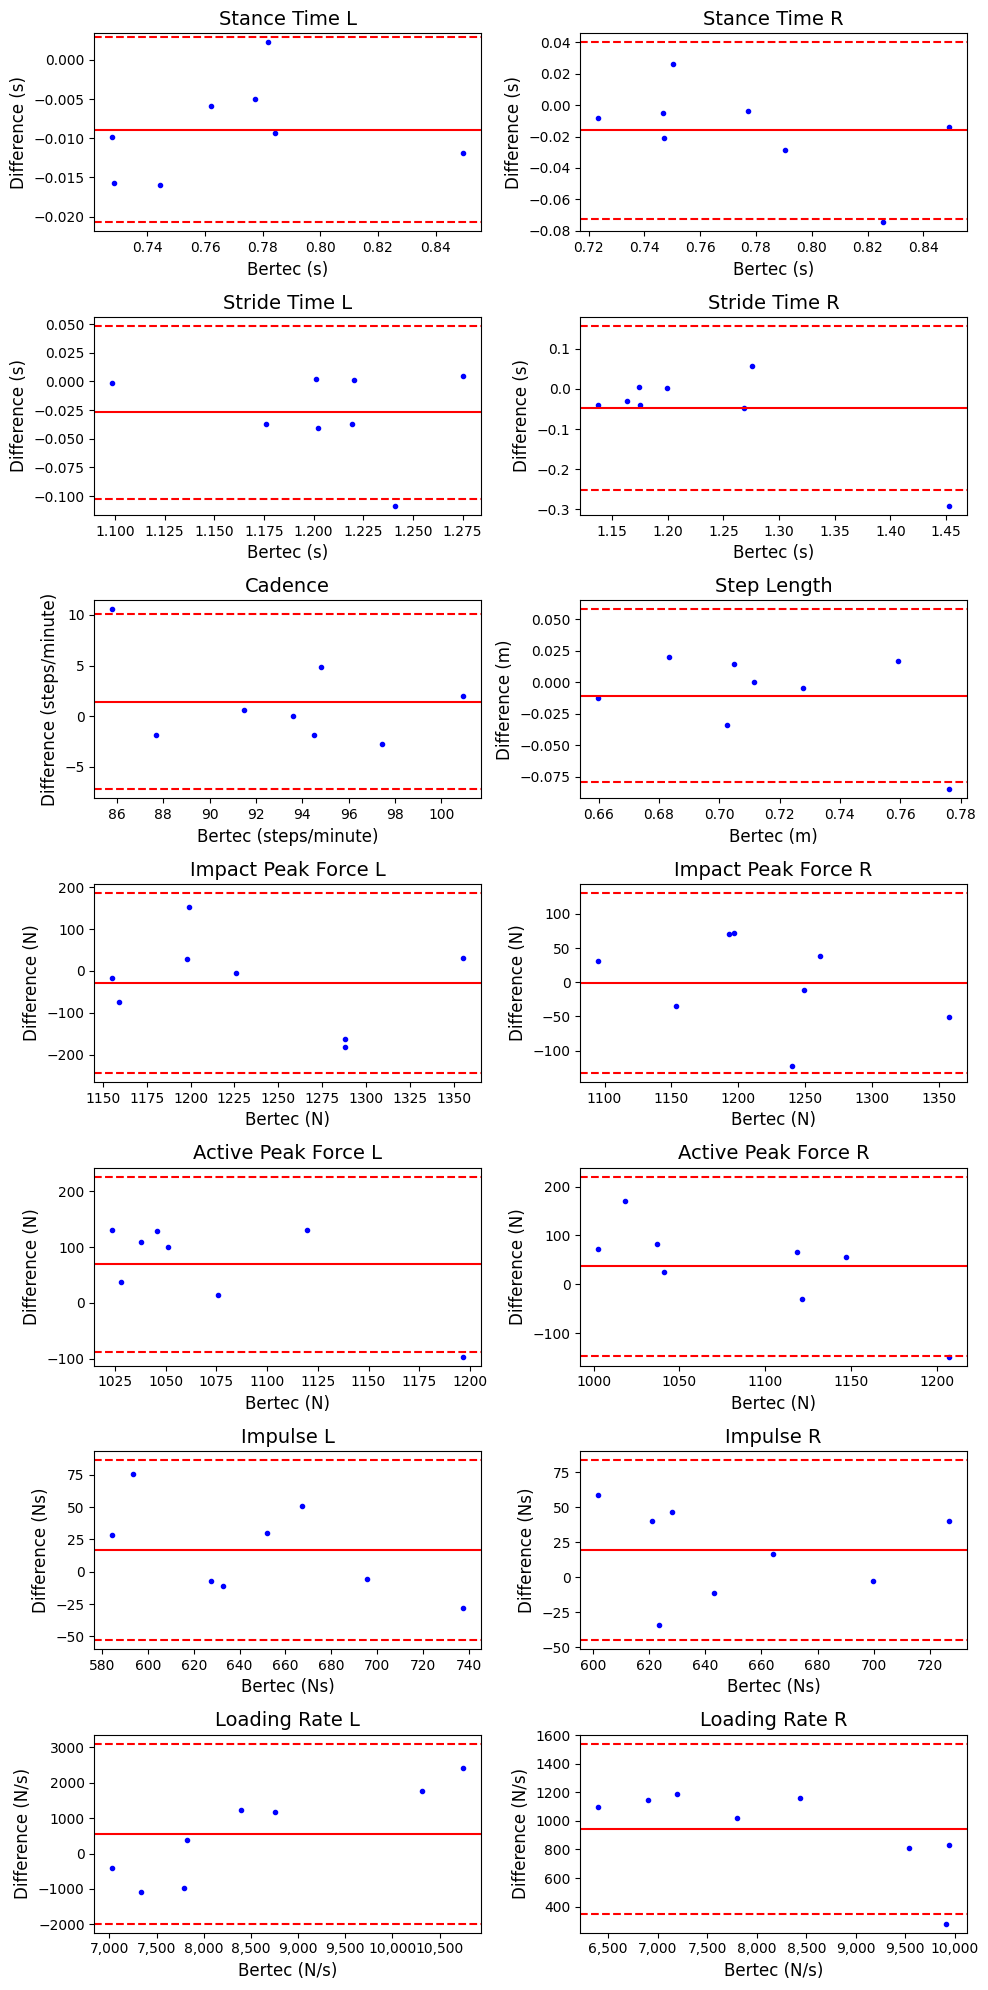

In [13]:
mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot(loadsol_25kg_flat, bertec_25kg_flat, 'flat_25kg')

df_flat_25kg = put_in_df("Flat_25kg")

mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot(loadsol_35kg_flat, bertec_35kg_flat, 'flat_35kg')

df_flat_35kg = put_in_df("Flat_35kg")

## Incline

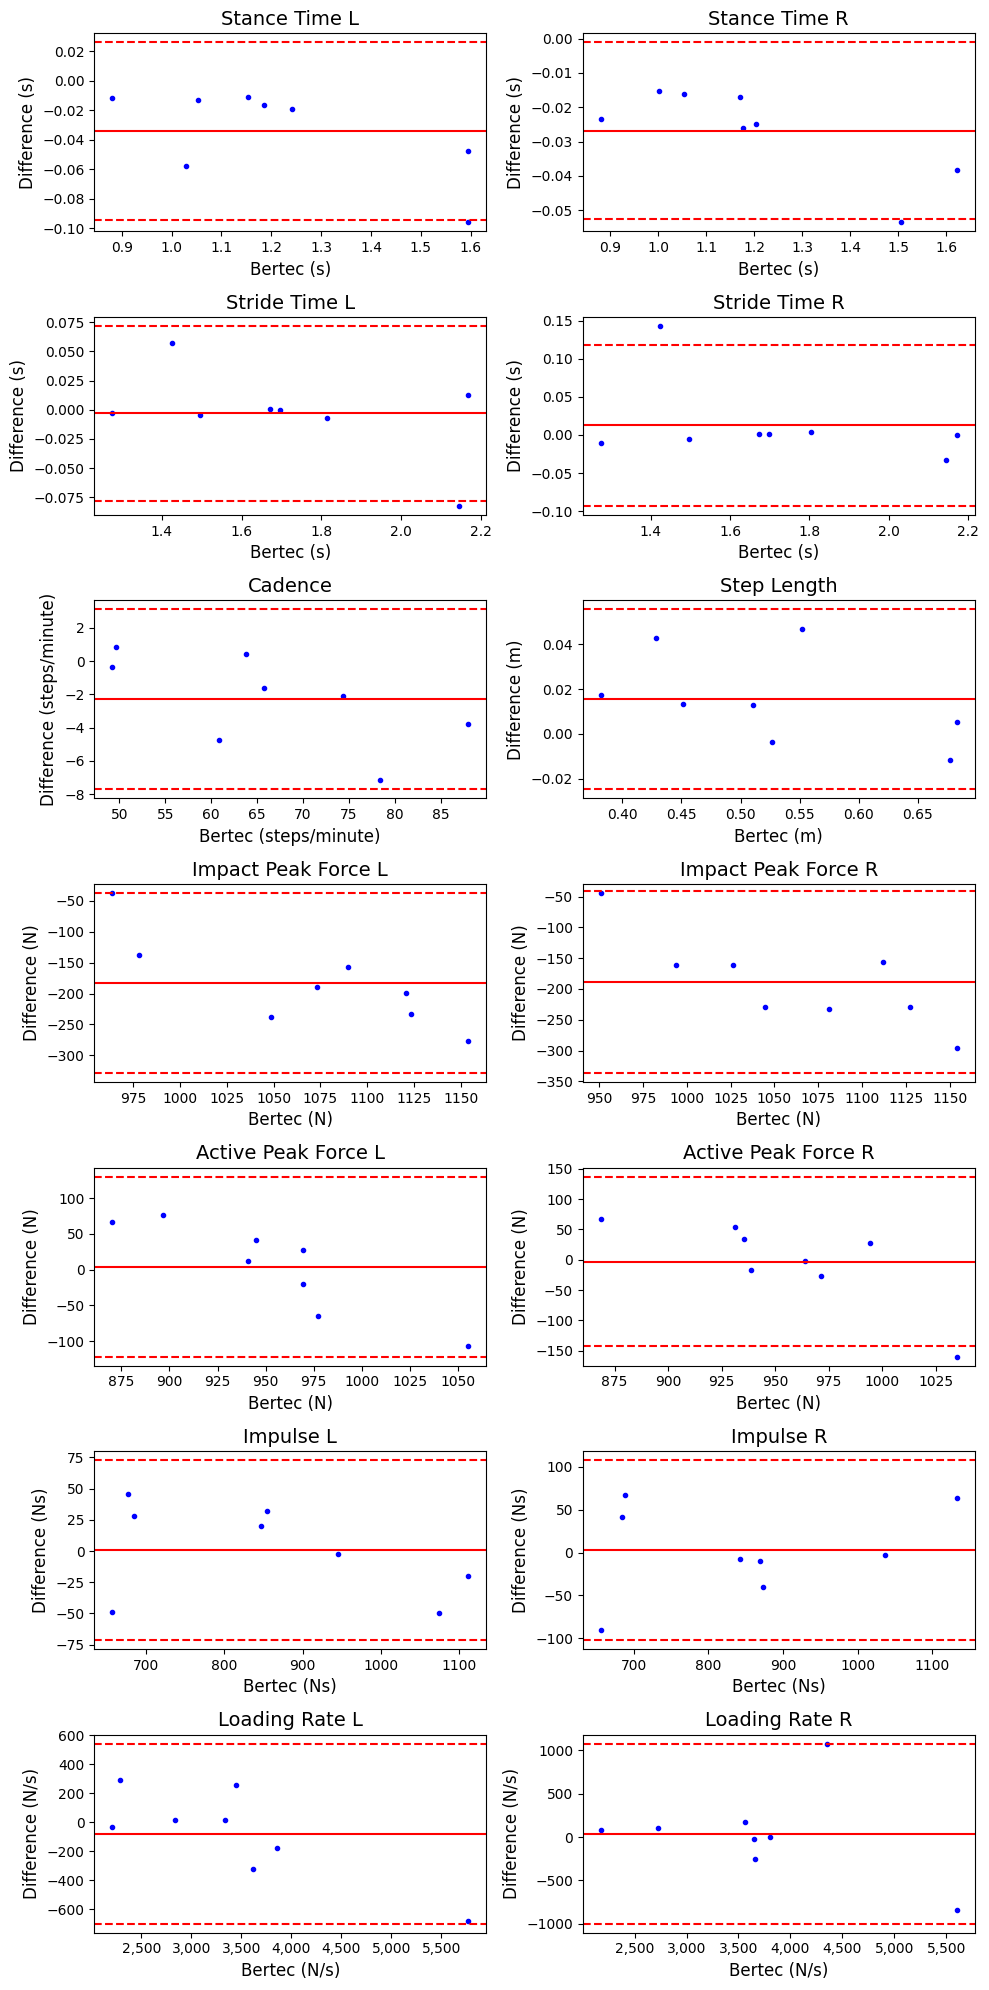

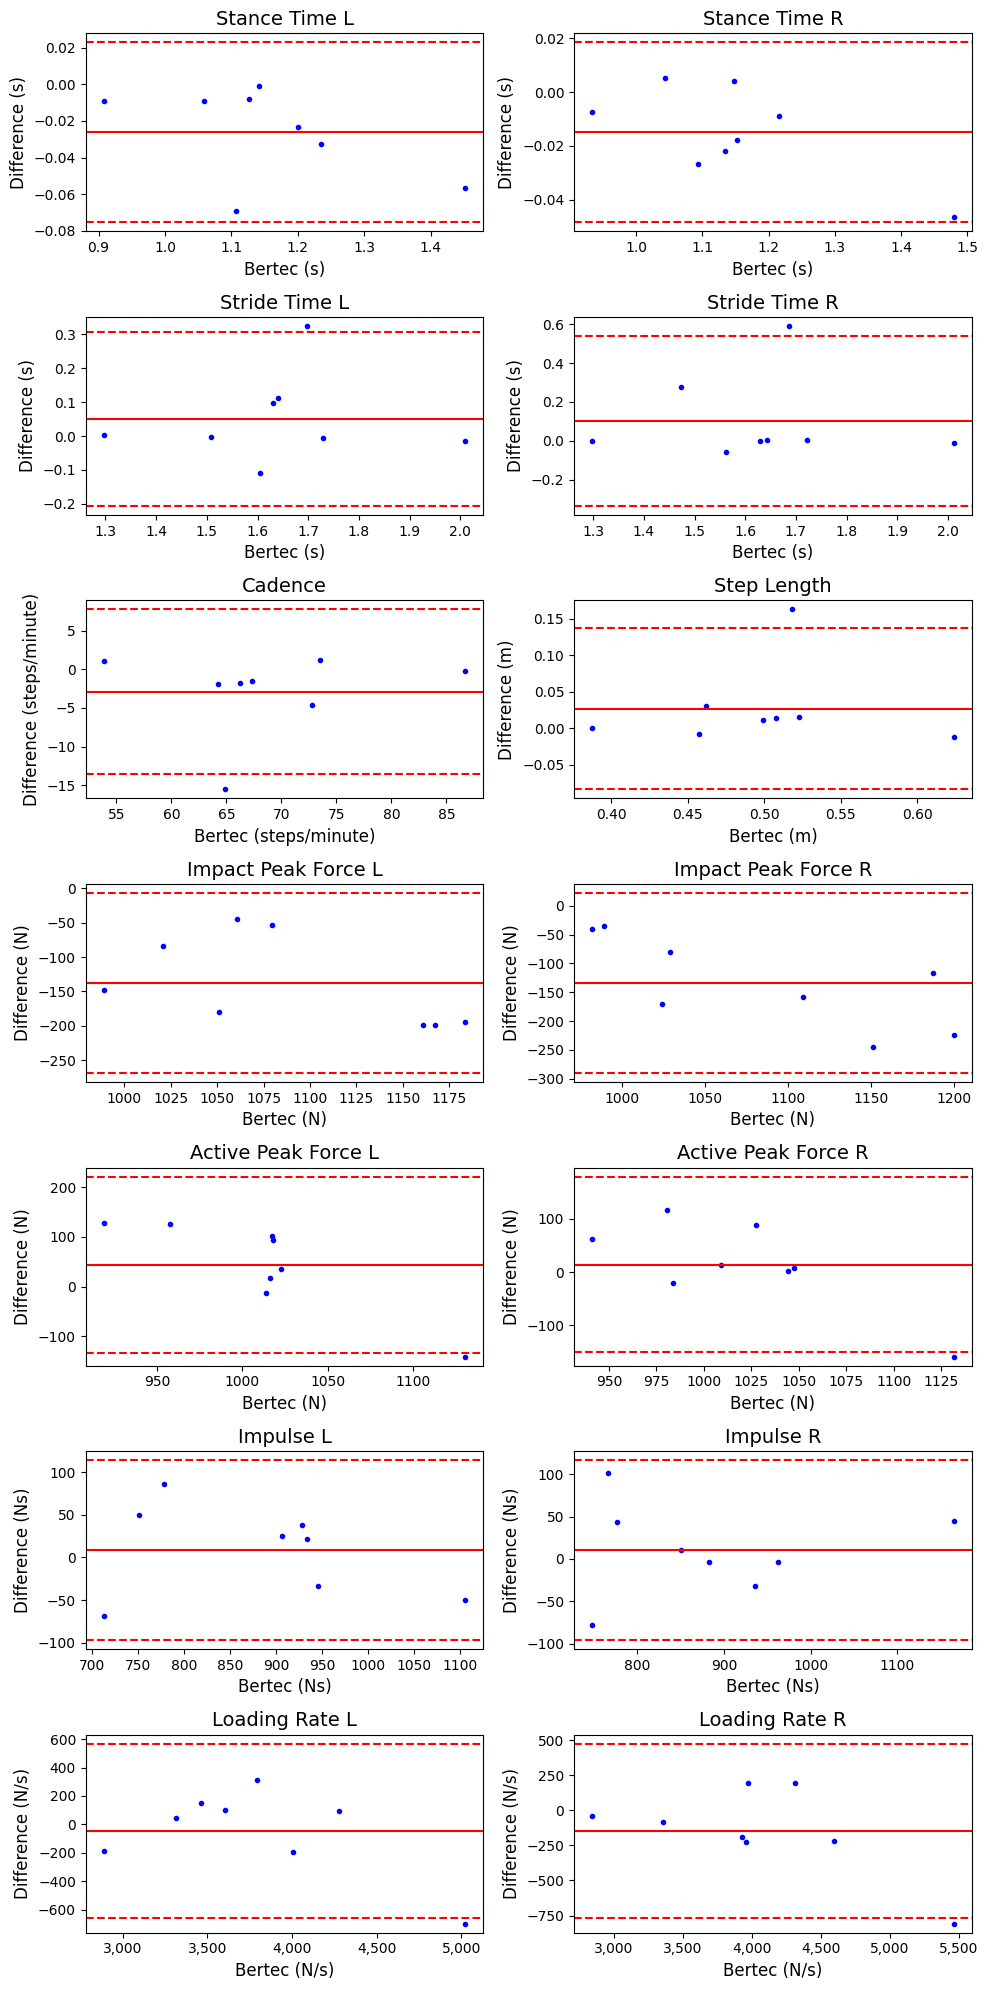

In [24]:
mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot(loadsol_25kg_incline, bertec_25kg_incline, 'incline_25kg')

df_incline_25kg = put_in_df("Incline_25kg")

mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot(loadsol_35kg_incline, bertec_35kg_incline, 'incline_35kg')

df_incline_35kg = put_in_df("Incline_35kg")

## Decline

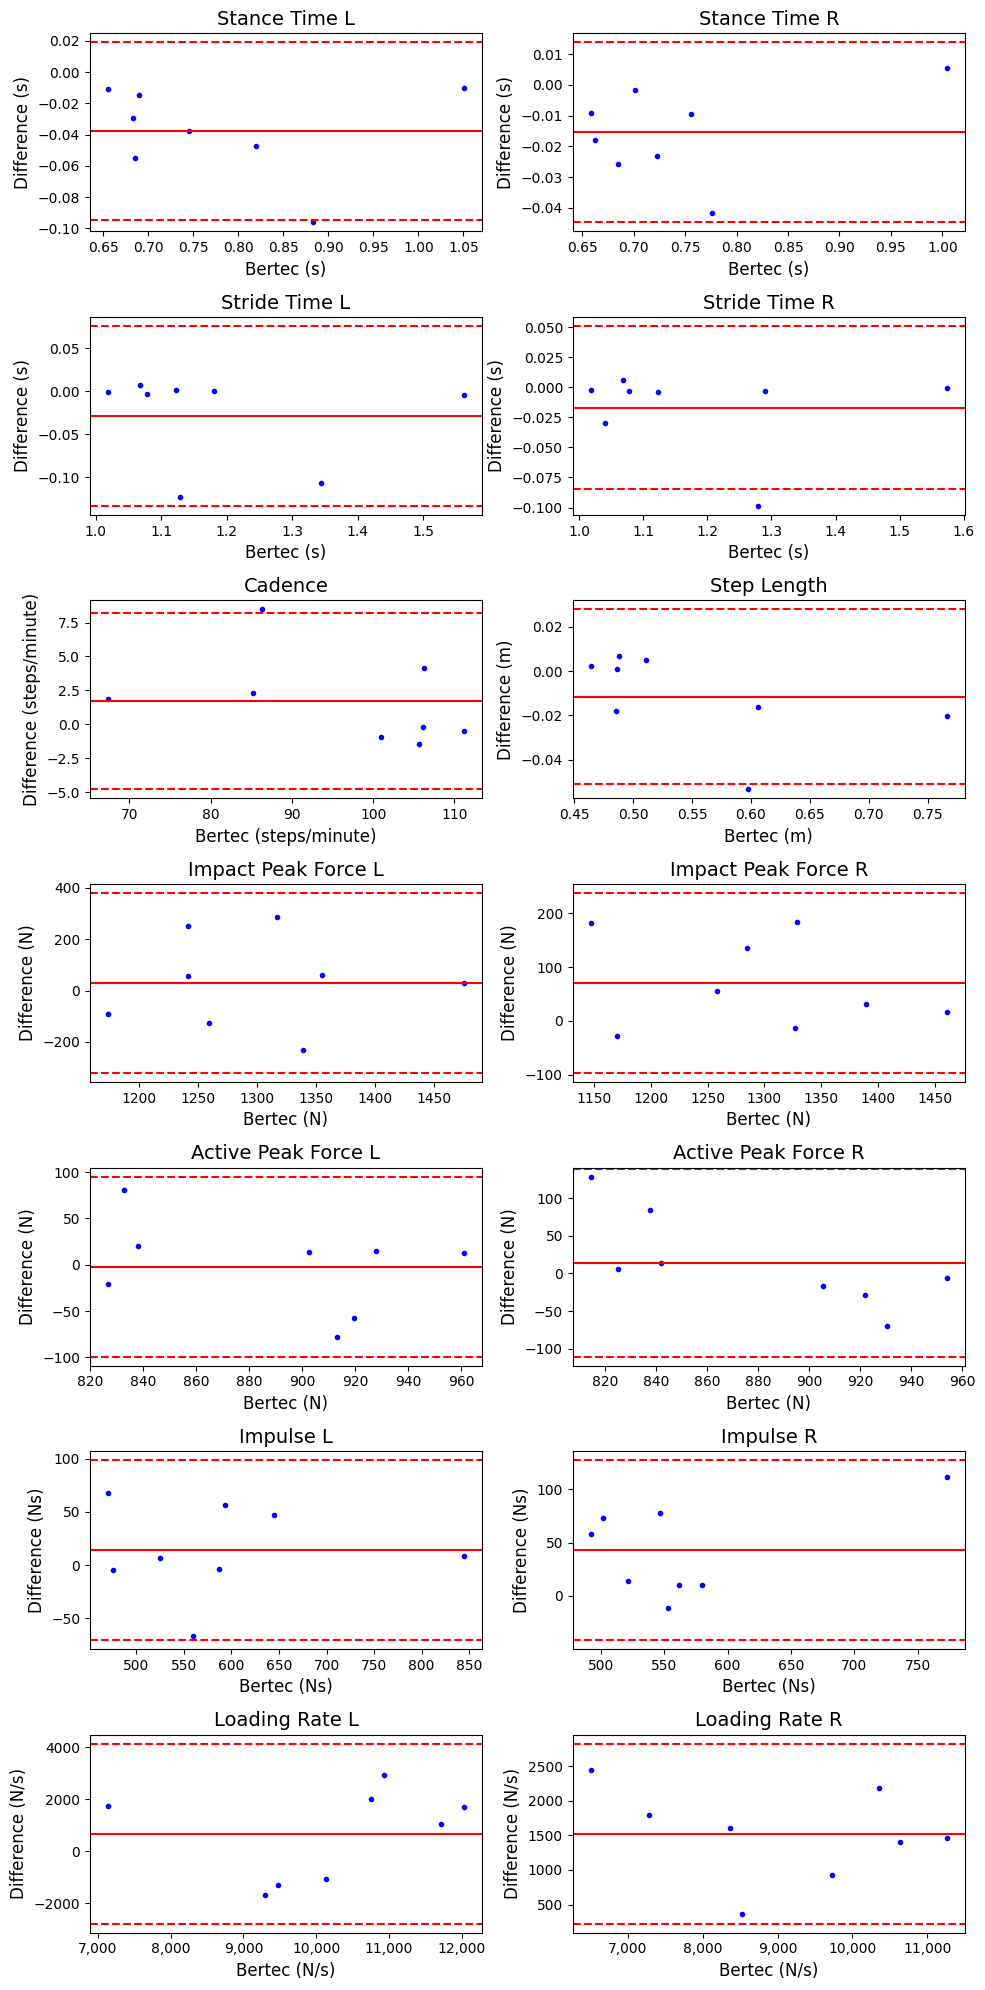

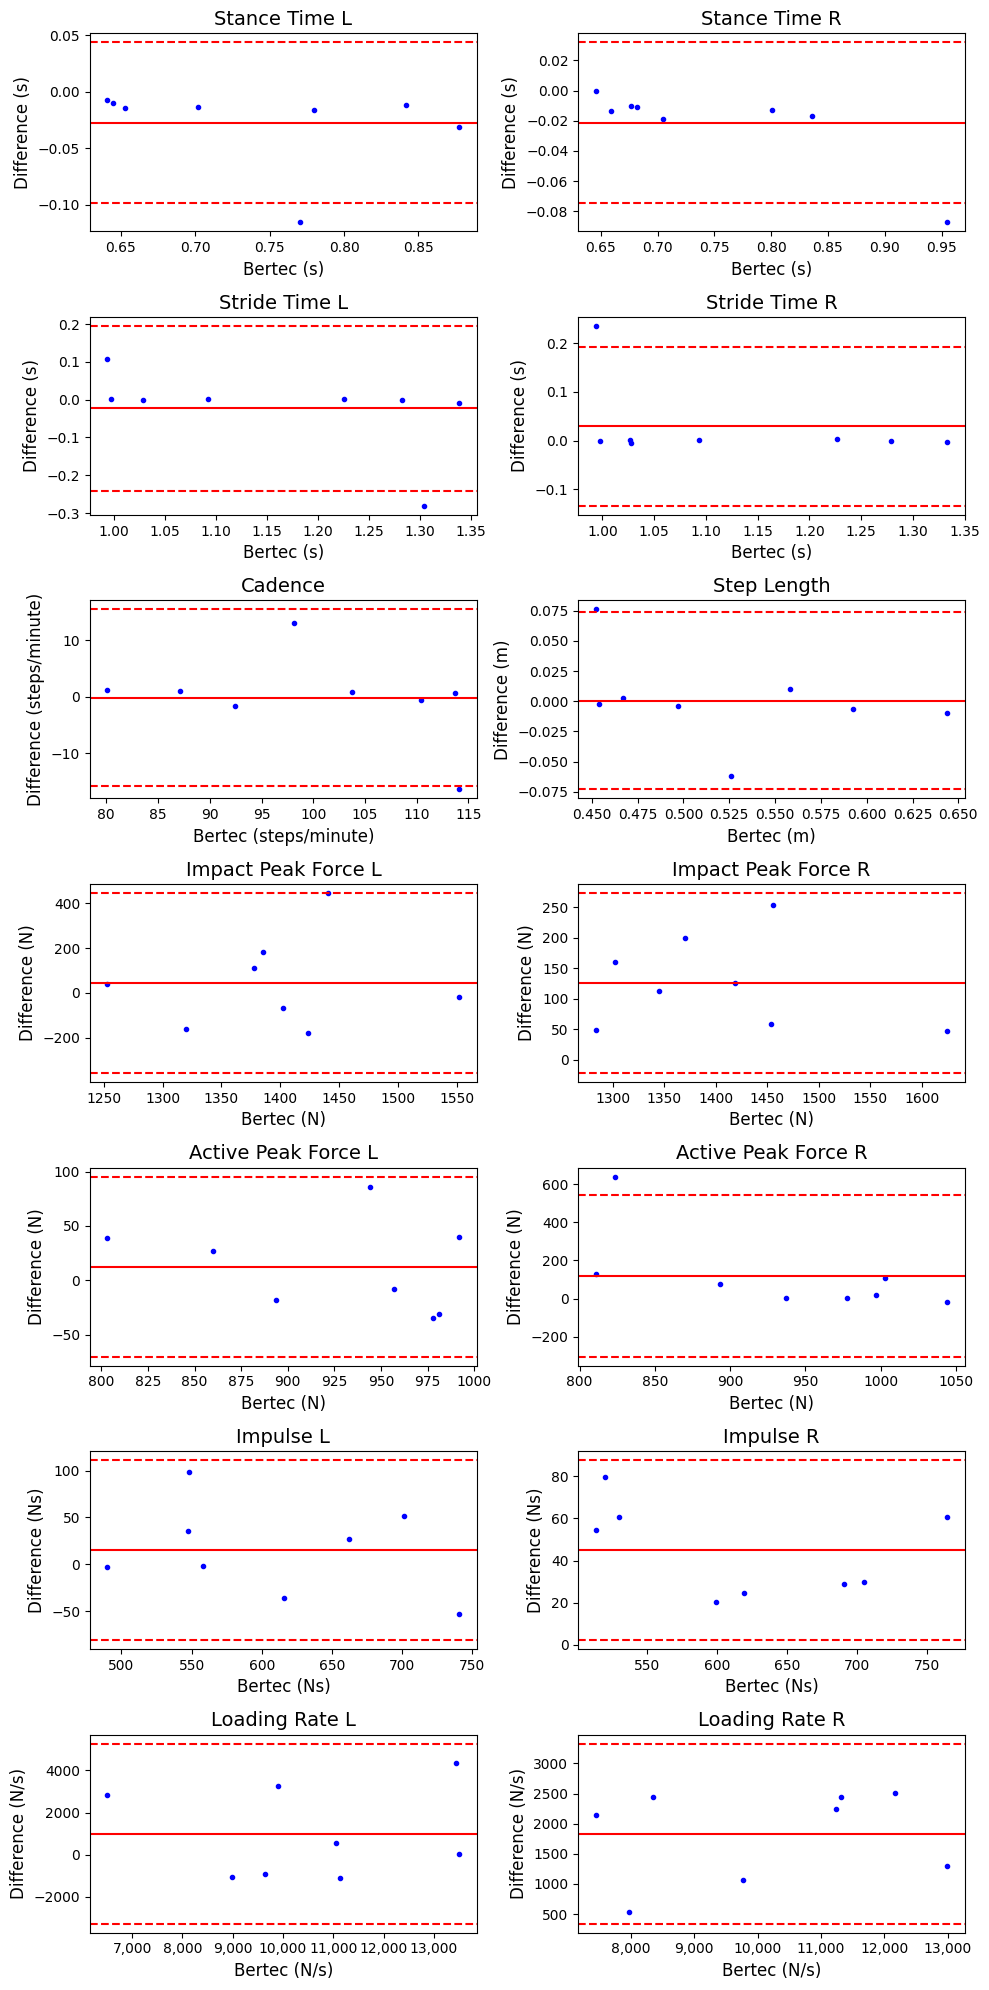

In [23]:
mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot(loadsol_25kg_decline, bertec_25kg_decline, 'decline_25kg')

df_decline_25kg = put_in_df("Decline_25kg")

mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot(loadsol_35kg_decline, bertec_35kg_decline, 'decline_35kg')

df_decline_35kg = put_in_df("Decline_35kg")

## DataFrames

In [25]:
df_flat_25kg

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.008637,-0.023261,0.005986,-0.02 - 0.01,Flat_25kg
1,Stance Time R,-0.011370,-0.023424,0.000684,-0.02 - 0.0,Flat_25kg
2,Stride Time L,0.000722,-0.011959,0.013402,-0.01 - 0.01,Flat_25kg
3,Stride Time R,-0.004163,-0.022288,0.013962,-0.02 - 0.01,Flat_25kg
4,Cadence,-0.273430,-3.799528,3.252668,-3.8 - 3.25,Flat_25kg
5,Step Length,0.000486,-0.028749,0.029721,-0.03 - 0.03,Flat_25kg
6,Impact Peak Force L,-45.756385,-280.112065,188.599295,-280.11 - 188.6,Flat_25kg
7,Impact Peak Force R,-25.911108,-192.915567,141.093350,-192.92 - 141.09,Flat_25kg
8,Active Peak Force L,51.553886,-63.466825,166.574598,-63.47 - 166.57,Flat_25kg
9,Active Peak Force R,17.638096,-155.341154,190.617346,-155.34 - 190.62,Flat_25kg


In [26]:
df_flat_35kg

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.008928,-0.020729,0.002873,-0.02 - 0.0,Flat_35kg
1,Stance Time R,-0.016133,-0.072239,0.039974,-0.07 - 0.04,Flat_35kg
2,Stride Time L,-0.026986,-0.102325,0.048354,-0.1 - 0.05,Flat_35kg
3,Stride Time R,-0.047901,-0.252472,0.156671,-0.25 - 0.16,Flat_35kg
4,Cadence,1.422899,-7.232808,10.078606,-7.23 - 10.08,Flat_35kg
5,Step Length,-0.010657,-0.078919,0.057605,-0.08 - 0.06,Flat_35kg
6,Impact Peak Force L,-28.746112,-243.408059,185.915834,-243.41 - 185.92,Flat_35kg
7,Impact Peak Force R,-1.140106,-132.841531,130.561319,-132.84 - 130.56,Flat_35kg
8,Active Peak Force L,69.146325,-88.324311,226.616961,-88.32 - 226.62,Flat_35kg
9,Active Peak Force R,36.953764,-146.694299,220.601828,-146.69 - 220.6,Flat_35kg


In [27]:
df_incline_25kg

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.034032,-0.094086,0.026022,-0.09 - 0.03,Incline_25kg
1,Stance Time R,-0.026779,-0.052484,-0.001075,-0.05 - -0.0,Incline_25kg
2,Stride Time L,-0.003154,-0.078020,0.071711,-0.08 - 0.07,Incline_25kg
3,Stride Time R,0.012672,-0.093098,0.118443,-0.09 - 0.12,Incline_25kg
4,Cadence,-2.307923,-7.713706,3.097859,-7.71 - 3.1,Incline_25kg
5,Step Length,0.015372,-0.024885,0.055629,-0.02 - 0.06,Incline_25kg
6,Impact Peak Force L,-183.389718,-328.378727,-38.400708,-328.38 - -38.4,Incline_25kg
7,Impact Peak Force R,-188.598111,-336.492140,-40.704083,-336.49 - -40.7,Incline_25kg
8,Active Peak Force L,4.217339,-121.482460,129.917138,-121.48 - 129.92,Incline_25kg
9,Active Peak Force R,-2.889138,-143.159160,137.380885,-143.16 - 137.38,Incline_25kg


In [28]:
df_incline_35kg

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.026221,-0.075359,0.022917,-0.08 - 0.02,Incline_35kg
1,Stance Time R,-0.014967,-0.048446,0.018511,-0.05 - 0.02,Incline_35kg
2,Stride Time L,0.049978,-0.205626,0.305582,-0.21 - 0.31,Incline_35kg
3,Stride Time R,0.101536,-0.334943,0.538015,-0.33 - 0.54,Incline_35kg
4,Cadence,-2.900375,-13.530304,7.729554,-13.53 - 7.73,Incline_35kg
5,Step Length,0.027104,-0.083822,0.138029,-0.08 - 0.14,Incline_35kg
6,Impact Peak Force L,-137.773967,-268.510739,-7.037195,-268.51 - -7.04,Incline_35kg
7,Impact Peak Force R,-134.049349,-290.038922,21.940225,-290.04 - 21.94,Incline_35kg
8,Active Peak Force L,43.298156,-134.311064,220.907375,-134.31 - 220.91,Incline_35kg
9,Active Peak Force R,14.206129,-151.182258,179.594517,-151.18 - 179.59,Incline_35kg


In [29]:
df_decline_25kg

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.037639,-0.094410,0.019132,-0.09 - 0.02,Decline_25kg
1,Stance Time R,-0.015407,-0.044650,0.013837,-0.04 - 0.01,Decline_25kg
2,Stride Time L,-0.028614,-0.133212,0.075984,-0.13 - 0.08,Decline_25kg
3,Stride Time R,-0.016876,-0.084722,0.050970,-0.08 - 0.05,Decline_25kg
4,Cadence,1.707885,-4.804937,8.220707,-4.8 - 8.22,Decline_25kg
5,Step Length,-0.011655,-0.051056,0.027745,-0.05 - 0.03,Decline_25kg
6,Impact Peak Force L,29.234019,-321.504665,379.972702,-321.5 - 379.97,Decline_25kg
7,Impact Peak Force R,70.326934,-96.775348,237.429216,-96.78 - 237.43,Decline_25kg
8,Active Peak Force L,-2.009311,-99.212198,95.193577,-99.21 - 95.19,Decline_25kg
9,Active Peak Force R,14.080978,-110.513008,138.674964,-110.51 - 138.67,Decline_25kg


In [30]:
df_decline_35kg

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.027393,-0.098692,0.043906,-0.1 - 0.04,Decline_35kg
1,Stance Time R,-0.021351,-0.074701,0.031999,-0.07 - 0.03,Decline_35kg
2,Stride Time L,-0.022792,-0.240921,0.195338,-0.24 - 0.2,Decline_35kg
3,Stride Time R,0.029288,-0.134225,0.192801,-0.13 - 0.19,Decline_35kg
4,Cadence,-0.235132,-15.879292,15.409028,-15.88 - 15.41,Decline_35kg
5,Step Length,0.000481,-0.073062,0.074024,-0.07 - 0.07,Decline_35kg
6,Impact Peak Force L,43.798304,-356.233874,443.830481,-356.23 - 443.83,Decline_35kg
7,Impact Peak Force R,125.779379,-21.948460,273.507219,-21.95 - 273.51,Decline_35kg
8,Active Peak Force L,12.579194,-70.344801,95.503189,-70.34 - 95.5,Decline_35kg
9,Active Peak Force R,119.713510,-304.411657,543.838676,-304.41 - 543.84,Decline_35kg


# Ground Reaction Force figure

In [ ]:
# Read Excel - Left
loadsol_left = pd.read_excel("Data_loadsol validation study.xlsx", sheet_name="loadsol_left", header=None)
bertec_left = pd.read_excel("Data_loadsol validation study.xlsx", sheet_name="Bertec_left", header=None)

# Read Excel - Right
loadsol_right = pd.read_excel("Data_loadsol validation study.xlsx", sheet_name="loadsol_right", header=None)
bertec_right = pd.read_excel("Data_loadsol validation study.xlsx", sheet_name="Bertec_right", header=None)

In [ ]:
# Function to filter dataset
def filter_dataset(df, equipment, mass, incline_condition):
    index = (df[1]==equipment)&(df[2]==mass)&(df[3]==incline_condition)
    df2 = df[index]
    df2 = df2.sort_values(df2.columns[0], ascending=True)
    print(f"{equipment} {mass} {incline_condition}: {df2[0].nunique()} unique rows")
    df2 = df2.iloc[:,4:]
    print(f"{equipment} {mass} {incline_condition}: {df2.shape[1]} columns\n")
    df2.columns = range(len(df2.columns))
    return df2

## Left

Initial dataset contains "Exo" data as well. Code remains unchanged but effectively the 'Non_Exo' filter or the argument, equipment, can be removed. 

In [ ]:
# Loadsol 25kg
loadsol_left_non_exo_25kg_flat = filter_dataset(loadsol_left, 'Non_Exo', '25kg', 'Flat')
loadsol_left_non_exo_25kg_incline = filter_dataset(loadsol_left, 'Non_Exo', '25kg', 'Inclined')
loadsol_left_non_exo_25kg_decline = filter_dataset(loadsol_left, 'Non_Exo', '25kg', 'Declined')

# Loadsol 35kg
loadsol_left_non_exo_35kg_flat = filter_dataset(loadsol_left, 'Non_Exo', '35kg', 'Flat')
loadsol_left_non_exo_35kg_incline = filter_dataset(loadsol_left, 'Non_Exo', '35kg', 'Inclined')
loadsol_left_non_exo_35kg_decline = filter_dataset(loadsol_left, 'Non_Exo', '35kg', 'Declined')

# Bertec 25kg
bertec_left_non_exo_25kg_flat = filter_dataset(bertec_left, 'Non_Exo', '25kg', 'Flat')
bertec_left_non_exo_25kg_incline = filter_dataset(bertec_left, 'Non_Exo', '25kg', 'Inclined')
bertec_left_non_exo_25kg_decline = filter_dataset(bertec_left, 'Non_Exo', '25kg', 'Declined')

# Bertec 35kg
bertec_left_non_exo_35kg_flat = filter_dataset(bertec_left, 'Non_Exo', '35kg', 'Flat')
bertec_left_non_exo_35kg_incline = filter_dataset(bertec_left, 'Non_Exo', '35kg', 'Inclined')
bertec_left_non_exo_35kg_decline = filter_dataset(bertec_left, 'Non_Exo', '35kg', 'Declined')

## Right

In [ ]:
# Loadsol 25kg
loadsol_right_non_exo_25kg_flat = filter_dataset(loadsol_right, 'Non_Exo', '25kg', 'Flat')
loadsol_right_non_exo_25kg_incline = filter_dataset(loadsol_right, 'Non_Exo', '25kg', 'Inclined')
loadsol_right_non_exo_25kg_decline = filter_dataset(loadsol_right, 'Non_Exo', '25kg', 'Declined')

# Loadsol 35kg
loadsol_right_non_exo_35kg_flat = filter_dataset(loadsol_right, 'Non_Exo', '35kg', 'Flat')
loadsol_right_non_exo_35kg_incline = filter_dataset(loadsol_right, 'Non_Exo', '35kg', 'Inclined')
loadsol_right_non_exo_35kg_decline = filter_dataset(loadsol_right, 'Non_Exo', '35kg', 'Declined')

# Bertec 25kg
bertec_right_non_exo_25kg_flat = filter_dataset(bertec_right, 'Non_Exo', '25kg', 'Flat')
bertec_right_non_exo_25kg_incline = filter_dataset(bertec_right, 'Non_Exo', '25kg', 'Inclined')
bertec_right_non_exo_25kg_decline = filter_dataset(bertec_right, 'Non_Exo', '25kg', 'Declined')

# Bertec 35kg
bertec_right_non_exo_35kg_flat = filter_dataset(bertec_right, 'Non_Exo', '35kg', 'Flat')
bertec_right_non_exo_35kg_incline = filter_dataset(bertec_right, 'Non_Exo', '35kg', 'Inclined')
bertec_right_non_exo_35kg_decline = filter_dataset(bertec_right, 'Non_Exo', '35kg', 'Declined')

## Plotting figure

Plotting ensemble mean and std using spm1d package.

### Left

In [ ]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_flat.to_numpy(), bertec_left_non_exo_25kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_incline.to_numpy(), bertec_left_non_exo_25kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_decline.to_numpy(), bertec_left_non_exo_25kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)

spm4 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_flat.to_numpy(), bertec_left_non_exo_35kg_flat.to_numpy())
spmi4 = spm4.inference(0.05, two_tailed=True, interp=True)

spm5 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_incline.to_numpy(), bertec_left_non_exo_35kg_incline.to_numpy())
spmi5 = spm5.inference(0.05, two_tailed=True, interp=True)

spm6 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_decline.to_numpy(), bertec_left_non_exo_35kg_decline.to_numpy())
spmi6 = spm6.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
left25,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# Left 25kg
ax = AX[0, 0] # First row
ax.set_title('Left - 25kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Left 35kg
ax = AX[1, 0]
ax.set_title('Left - 35kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()


### Incline
# Left 25kg
ax = AX[0, 1]
ax.set_title('Left - 25kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Left 35kg
ax = AX[1, 1]
ax.set_title('Left - 35kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()

### Decline
# Left 25kg
ax = AX[0, 2]
ax.set_title('Left - 25kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Left 35kg
ax = AX[1, 2]
ax.set_title('Left - 35kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()

### Right

In [ ]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_flat.to_numpy(), bertec_right_non_exo_25kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_incline.to_numpy(), bertec_right_non_exo_25kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_decline.to_numpy(), bertec_right_non_exo_25kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)

spm4 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_flat.to_numpy(), bertec_right_non_exo_35kg_flat.to_numpy())
spmi4 = spm4.inference(0.05, two_tailed=True, interp=True)

spm5 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_incline.to_numpy(), bertec_right_non_exo_35kg_incline.to_numpy())
spmi5 = spm5.inference(0.05, two_tailed=True, interp=True)

spm6 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_decline.to_numpy(), bertec_right_non_exo_35kg_decline.to_numpy())
spmi6 = spm6.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
right25,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# Right 25kg
ax = AX[0, 0] # First row
ax.set_title('Right - 25kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRFz  (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Right 35kg
ax = AX[1, 0]
ax.set_title('Right - 35kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()


### Incline
# Right 25kg
ax = AX[0, 1]
ax.set_title('Right - 25kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Right 35kg
ax = AX[1, 1]
ax.set_title('Right - 35kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()

### Decline
# Right 25kg
ax = AX[0, 2]
ax.set_title('Right - 25kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Right 35kg
ax = AX[1, 2]
ax.set_title('Right - 35kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()